## Imports and Loading Data 

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score,confusion_matrix, classification_report, roc_curve, auc 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load fraud detection dataset
data = pd.read_csv('../Raw Data /PS_20174392719_1491204439457_log.csv')
data_ = pd.DataFrame(data)
data_.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Data Cleaning 

In [3]:
# Although the project is not actually in USD, it will be easier to understand the context and understand outliers 
# better by viewing the necessary columns as currency 

data['amount'] = data['amount'].apply(lambda x: f"${x:,.2f}")
data['oldbalanceOrg'] = data['oldbalanceOrg'].apply(lambda x: f"${x:,.2f}")
data['newbalanceOrig'] = data['newbalanceOrig'].apply(lambda x: f"${x:,.2f}")
data['oldbalanceDest'] = data['oldbalanceDest'].apply(lambda x: f"${x:,.2f}")
data['newbalanceDest'] = data['newbalanceDest'].apply(lambda x: f"${x:,.2f}")

In [6]:
# Confirming changes were made to the dataframe 
data.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,"$9,839.64",C1231006815,"$170,136.00","$160,296.36",M1979787155,$0.00,$0.00,0,0
1,1,PAYMENT,"$1,864.28",C1666544295,"$21,249.00","$19,384.72",M2044282225,$0.00,$0.00,0,0
2,1,TRANSFER,$181.00,C1305486145,$181.00,$0.00,C553264065,$0.00,$0.00,1,0
3,1,CASH_OUT,$181.00,C840083671,$181.00,$0.00,C38997010,"$21,182.00",$0.00,1,0
4,1,PAYMENT,"$11,668.14",C2048537720,"$41,554.00","$29,885.86",M1230701703,$0.00,$0.00,0,0
5,1,PAYMENT,"$7,817.71",C90045638,"$53,860.00","$46,042.29",M573487274,$0.00,$0.00,0,0
6,1,PAYMENT,"$7,107.77",C154988899,"$183,195.00","$176,087.23",M408069119,$0.00,$0.00,0,0
7,1,PAYMENT,"$7,861.64",C1912850431,"$176,087.23","$168,225.59",M633326333,$0.00,$0.00,0,0
8,1,PAYMENT,"$4,024.36",C1265012928,"$2,671.00",$0.00,M1176932104,$0.00,$0.00,0,0
9,1,DEBIT,"$5,337.77",C712410124,"$41,720.00","$36,382.23",C195600860,"$41,898.00","$40,348.79",0,0


### Determining Relevant Columns and Sub-groups to minimize less relevant data to the model 

A few other columns that seem relevant to the fraud detection model are the different balance columns that show the transaction amounts in refernce to the original balances. This is helpful in fraud detection because a targeted account would most likely show a large depletion in their account relevant to the balance they currently held in the account already. 

Hypothesized highly relevant columns to the fraud detection model: 
**OldBalanceOrg: The origin accounts balance before the transaction** <br> 

**NewBalanceOrg: The origin accounts balance after the transaction**<br>

The last columns that are most relevant to the model is the destination in which the money is going. There are three columnns that deal with destination of the transaction amount, however it's unclear what the "nameDest" is referencing if only comparing to the original account number. However, if any "Destination"- account appears amongst multiple different "Origins": ['NameOrig'], then it may be an account that commits frequent fraud. The new balance and old balance destination appear to be a good predictor of potential fraud as well. 

In [7]:
data['type'].unique()


array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

The dataframe has the following unique values in the "type" column which can be used for further analysis:

PAYMENT <br>
TRANSFER<br>
CASH_OUT<br>
DEBIT<br>
CASH_IN
<br>



### Proposed Edits to the dataframe
<br> 

**Columns to Drop**
NameOrigin 

**Proposed New Columns**

In [8]:
# Separate numerical and categorical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# Check the results
print(f"Numerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")


Numerical Features: Index(['step', 'isFraud', 'isFlaggedFraud'], dtype='object')
Categorical Features: Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest'],
      dtype='object')


## Initial Data Visualizations

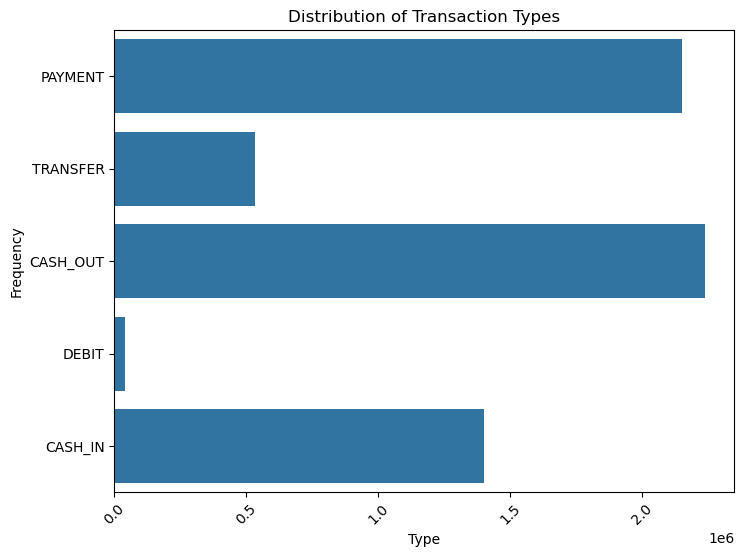

In [9]:

# Univariate Analysis - Distribution of 'type' column
plt.figure(figsize=(8, 6))
sns.countplot(data['type'])
plt.title('Distribution of Transaction Types')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()




In the graph above, the distribution of transaction types shows the different types of transactions made at each instance. Since this is a fraud detection model, it might not be necessary to take into account a transaction type such as "CASH_IN". A transaction type of adding money into an account very rarely would be fraudulent and even if it were, the transactions that will be most likely to be high predictors of fraud would be high values in 'CASH_OUT' or 'TRANSFER' 

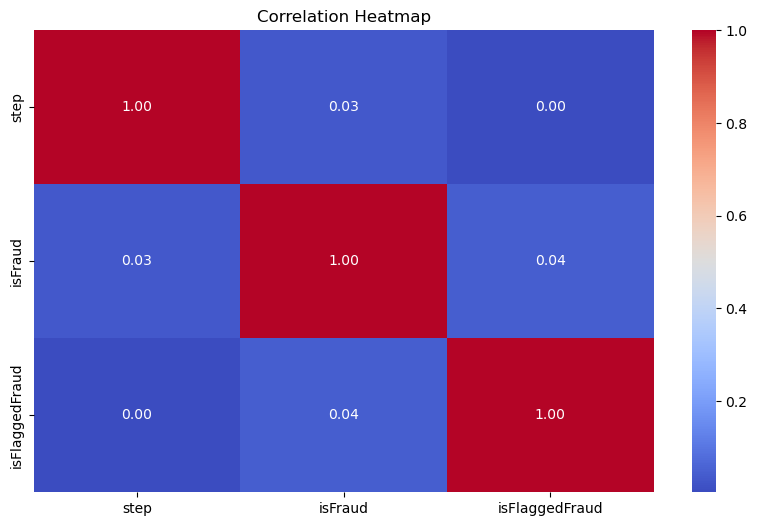

In [10]:
# Bivariate Analysis - Correlation heatmap between numerical features
corr = data[numerical_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



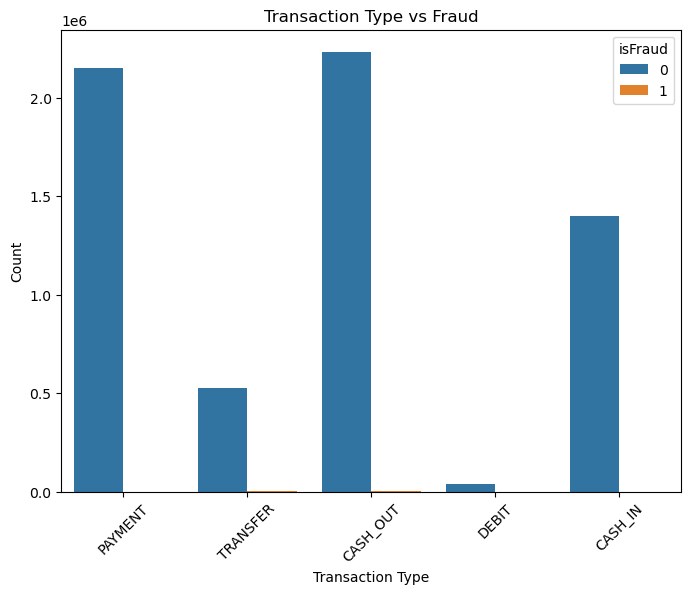

In [11]:
# Bivariate Analysis - Transaction Type vs Fraud
plt.figure(figsize=(8, 6))
sns.countplot(x='type', hue='isFraud', data=data)
plt.title('Transaction Type vs Fraud')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Bivariate Analysis - Amount vs Fraud (Boxplot)
plt.figure(figsize=(20, 10))
sns.boxplot(x='isFraud', y='amount', data=data)
plt.title('Amount vs Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.show()

It's a bit difficult to truly view the data through box plots with such a large amount of data. It may be clearer to use a sample of the data instead. 

## Taking a smaller sample of the whole dataset: Downsampling to get a better picture of the data with limited outliers  

In [13]:
# Sample a portion of the data

#print(data[pairplot_columns].head(50))
pairplot_data_sampled = data.sample(frac=0.1, random_state=100)

print(data['isFraud'])
print(type(data['isFraud']))

#pairplot_data_sampled.tail(50)


0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64
<class 'pandas.core.series.Series'>


In [14]:
# Here I was having difficulties because the sample I created wasn't showing up as a pandas dataframe with each column as a series. Instead, the columns were also dataframes which I have  resolved
# 
print(type(pairplot_data_sampled['isFraud']))  


<class 'pandas.core.series.Series'>


In [15]:
print(pairplot_data_sampled['isFraud'].dtype)   


int64


In [16]:
data['isFraud'].value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [17]:
data['isFraud'].value_counts(normalize=True) * 100


isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64

In the two cells above, it's a bit more clear to view the imbalance between the two classes. This makes sense, as we can imagine that the baseline of fraud detection would be that a transaction is flagged as "Not Fraud", which is classified as 0.  

In order to deal with this issue, we can use Synthetic Minority Over-sampling Technique (SMOTE) to address the issue of the minority class. 

<br> 

**I've added the following to the top of the jupyter notebook:**

from imblearn.over_sampling import SMOTE <br>
from sklearn.model_selection import train_test_split <br>
from sklearn.ensemble import RandomForestClassifier <br>
from sklearn.metrics import classification_report <br>